# House Sales Prediction(LR)

## Members: Chenang Zhang, Ketaki Joshi, Chen Liang, Yuanying Li

In [0]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Aquire data
path='https://docs.google.com/spreadsheets/d/e/2PACX-1vS6vLdxF3iW5Hf4DAXK8fvOFGQaBcpDoC5n9qmgM2DH3TCGN1O8TEvpNCbaL2P9_WzkYMycIk04aeGa/pub?gid=2094208767&single=true&output=csv'
df=pd.read_csv(path)

In [0]:
#Describe data
df.head()

,Id,SF,SalePrice
0,1,4316,755000
1,2,4476,745000
2,3,3627,625000
3,4,2364,611657
4,5,2822,582933


In [0]:
#reshape to 2d arrary
x=np.array(df.SF).reshape(-1,1)
y=np.array(df.SalePrice).reshape(-1,1)
#split train test and do the regresssion
X_train, X_test, y_train, y_test = train_test_split(x,y)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#find slope and intercept for regression line
intercept=lin_reg.intercept_
coeff=lin_reg.coef_

In [0]:
#calculate r^2 to determine how well is the model
listing_y_pred = lin_reg.predict(X_test)
r2_score(y_test, listing_y_pred)

0.4387329382958072

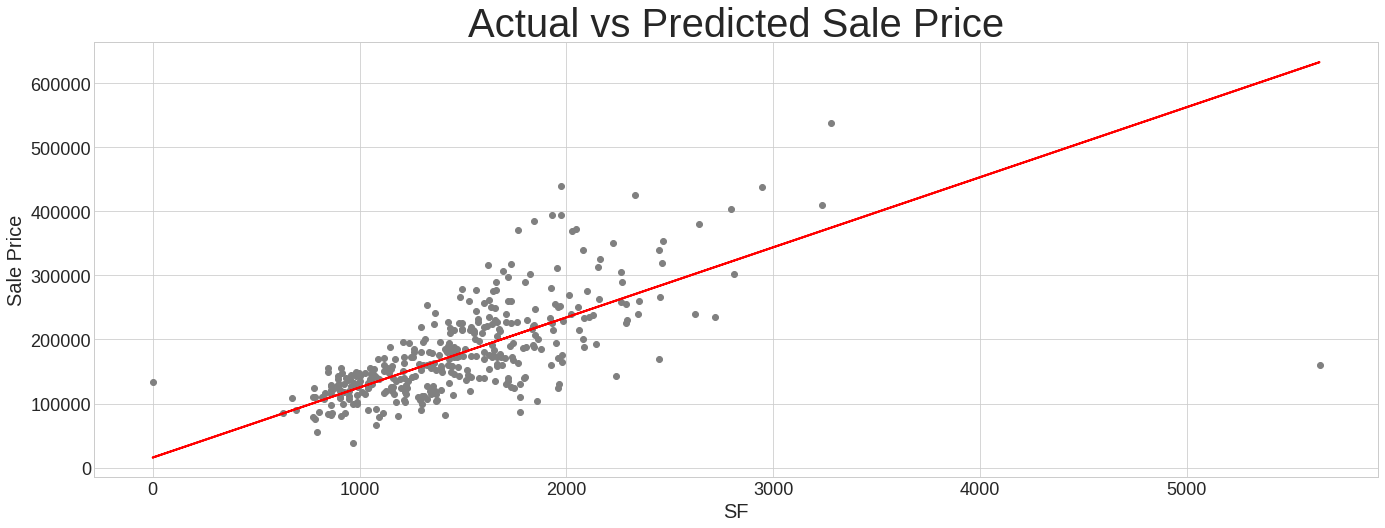

In [0]:
#Draw the regression
rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, listing_y_pred, color='red', linewidth=2)
plt.title('Actual vs Predicted Sale Price',size=40)

#Making it beautiful
plt.xlabel('SF',size=20)
plt.ylabel('Sale Price', size=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


#Question 1: The distribution of Sale Price

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price ')]

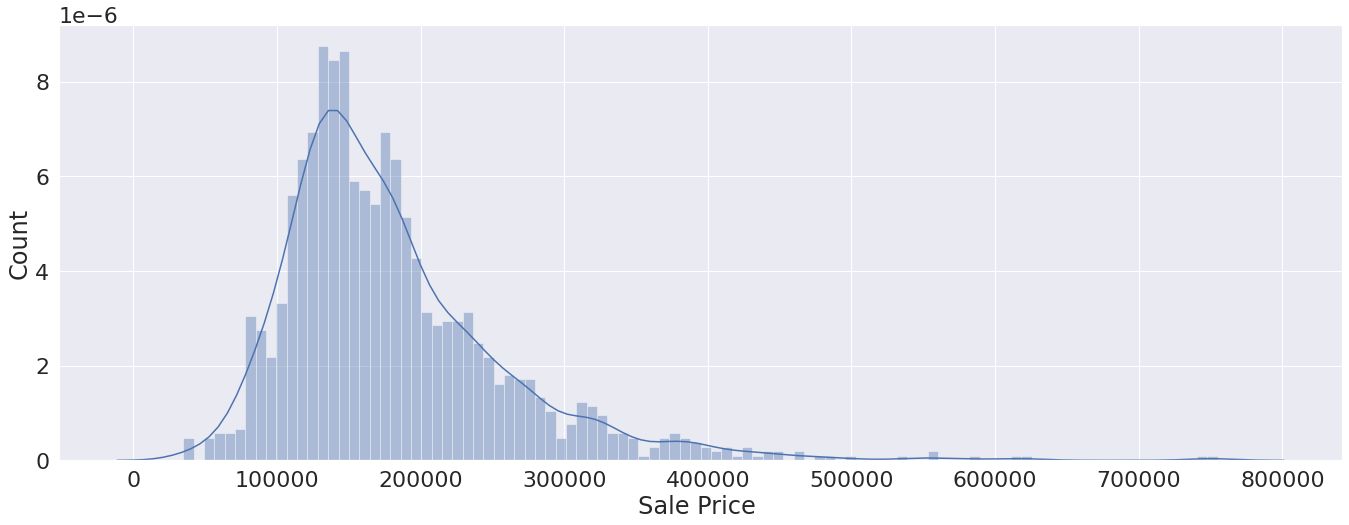

In [0]:
# It is skewed to the right with only one peak
sns.set(font_scale = 2)
sns.distplot(df.SalePrice,bins=100).set(xlabel="Sale Price ", ylabel="Count")

#Question 2:Provide an estimate cost for a house with 1000 sq ft.



In [0]:
1000*coeff+intercept
print("An estimate cost for a house with 1000 sq ft is:", 1000*coeff+intercept)

An estimate cost for a house with 1000 sq ft is: [[125073.73090162]]


# Question 3:The amount of sq. footage that $1,000,000 can buy.


In [0]:
(1000000-intercept)/coeff
print("An estimate amount of sq. footage that $1,000,000 can buy is:", (1000000-intercept)/coeff)

An estimate amount of sq. footage that $1,000,000 can buy is: [[8997.98801625]]


#Question 4: Interpretation of the prices for houses in the 4000-5000 sq. footage range.




In [0]:
#Check the predicted price for 4000 and 5000 sf.
low=4000*coeff+intercept
high=5000*coeff+intercept
print('price for 4000 sf：',low)
print('price for 5000 sf：',high)

price for 4000 sf： [[453253.61838854]]
price for 5000 sf： [[562646.91421751]]


In [0]:
#Describe the sale price
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [0]:
#To check whether the price for 4000 and 5000 sf are outliers.
iqr=df.SalePrice.quantile(0.75)-df.SalePrice.quantile(0.25)
miniout=df.SalePrice.quantile(0.75)+(1.5*iqr)
bool1=low>miniout
bool2=high>miniout
print('Sale Price minimum outlier',miniout)
print('Sale Price for 4000 is outlier',bool1)
print('Sale Price for 5000 is outlier',bool2)

Sale Price minimum outlier 340037.5
Sale Price for 4000 is outlier [[ True]]
Sale Price for 5000 is outlier [[ True]]


In [0]:
#Check the amount of std of the price for 4000 and 5000 sf deviate from the mean
mean=df.SalePrice.mean()
std=df.SalePrice.std()
amount_std_small=(low-mean)/std
amount_std_big=(high-mean)/std
print('The amount of standard deviation of the price for 4000 sf deviating from the mean is',amount_std_small)
print('The amount of standard deviation of the price for 5000 sf deviating from the mean is',amount_std_big)

The amount of standard deviation of the price for 4000 sf deviating from the mean is [[3.42804434]]
The amount of standard deviation of the price for 5000 sf deviating from the mean is [[4.80505654]]


Sale prices of houses with areas between 4000 and 5000 are outliers. They deviate a lot from the average sale price.